##  Section 5.1: Setting up the parameter

In [13]:
import math

"""Function find_processshard used for find the process shard size:(we use this function in section 5.1's Parameters for Process shard) )
    Input:
        pa:Proportion of adversarial nodes in the system (upper bound), from 0 to 0.33.
        pf:The maximum failure rate that can be tolerated, entered as x, means that minus x times of 10 can be tolerated, for example input 7 means the biggest failure rate is 10^-7.
        
    Output:
        n: The minimum process shard size that satisfies the condition.
"""
def find_processshard(pa,pf):
    n=0
    while pb**n>=10**(-pa):
        n+=1
    return n

"""Function find_processshard used for find the control shard size:(we use this function in section 5.1's Parameters for Control shard)
    Input:
        pa:Proportion of adversarial nodes in the system (upper bound), from 0 to 0.33.
        pf:The maximum failure rate that can be tolerated, entered as x, means that minus x times of 10 can be tolerated, for example input 7 means the biggest failure rate is 10^-7.
        
    Output:
        n: The minimum control shard size that satisfies the condition.
"""
def find_controlshard(pa,pf):
    Nc = 3
    i = math.ceil(0.5 * Nc)
    sum = 1
    while sum >= 10**(-pf):
        sum = 0
        for j in range(i, Nc):
            sum += math.comb(Nc, j) * (pa**j) * ((1-pa)**(Nc-j))
        Nc += 1
        i = math.ceil(0.5 * Nc)
    return Nc-1

"""Function find_generalsize used for find the shard size in general condition:(we use this function in finding gearbox's shard size)
    Input:
        pa:Proportion of adversarial nodes in the system (upper bound), from 0 to 0.33.
        pf:The maximum failure rate that can be tolerated, entered as x, means that minus x times of 10 can be tolerated, for example input 7 means the biggest failure rate is 10^-7.
        Liveness: The Liveness threshold of the shard(from 0 to 1).
    Output:
        n: The minimum shard size that satisfies the condition.
"""
def find_generalsize(pa,pf,Livness):
    Nc = 15
    i = math.ceil((1-Livness) * Nc)
    sum = 1
    while sum >= 10**(-pf):
        sum = 0
        for j in range(i, Nc):
            sum += math.comb(Nc, j) * (pa**j) * ((1-pa)**(Nc-j))
        Nc += 1
        i = math.ceil((1-Livness) * Nc)
    return Nc-1

"""Function findshardsize used for find the shard size in given pf threshold:(we use this function in section 5.1's Determining 𝑃𝑓 𝑝 and 𝑃𝑓 𝑐 )
    Input:
        num: the number of nodes in the whole system
    Output:
        cs: the array of control shard size that satisfies different pf (from 10^-5 to 10^-10).
        ps: the array of process shard size that satisfies different pf (from 10^-5 to 10^-10).
"""
def findshardsize(num):
    index=[]
    ps=[]
    cs=[]
    for j in range(5,10):
        for i in range(0,15):
            if (10**(-i))*math.floor(N/find_Nf(0.33,i))+((10**(-i))*math.floor(N/find_Nc(i,0.33)))<10**(-j):
                print((10**(-i))*math.floor(N/find_Nf(0.33,i))+((10**(-i))*math.floor(N/find_Nc(i,0.33))))
                index.append(j)
                ps.append(find_Nf(0.33,i))
                cs.append(find_Nc(i,0.33))
                break
    return cs,ps

## Section 5.2: Shard size and performance

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

"""
This code is section 5.2's Shard size and performance.
"""

# List to store average slopes
avg_slope = []

# Iterate over different values of k
for k in range(7, 16):
    # Create an array of x values from 0 to 30
    x = np.arange(0, 31)
    
    # Run the simulation and store the results in a list
    success_rate = []
    for j in range(0, 31):
        success_sum = 0
        for i in range(0, 200):
            # Generate nodes, with a certain percentage being malicious
            total_nodes = k * 1000
            num_malicious_nodes = int(total_nodes * j * 0.01)
            nodes = [False] * (total_nodes - num_malicious_nodes) + [True] * num_malicious_nodes
            random.shuffle(nodes)

            # Randomly divide nodes into groups of size k
            num_groups = total_nodes // k
            groups = [nodes[i:i + k] for i in range(0, total_nodes, k)]

            # Count number of successful groups (no malicious nodes)
            num_success = sum(1 for group in groups if not True in group)
            success_sum += num_success

        # Calculate success rate and append to the list
        success_rate.append(success_sum / 500 / num_groups)

    # Calculate the average slope of the curve
    num_points = len(x)
    slopes = []
    for i in range(num_points - 1):
        # Calculate the slope between adjacent points
        dx = x[i+1] - x[i]
        dy = success_rate[i+1] - success_rate[i]
        slope = dy / dx
        slopes.append(slope)

    # Calculate the mean slope
    mean_slope = np.mean(slopes)
    avg_slope.append(mean_slope)

    # Print the average slope
    print("The average slope of the curve is:", mean_slope)




The average slope of the curve is: -0.012229266666666667
The average slope of the curve is: -0.012566733333333335
The average slope of the curve is: -0.0127928
The average slope of the curve is: -0.012949000000000004
The average slope of the curve is: -0.013071933333333334
The average slope of the curve is: -0.013148333333333335
The average slope of the curve is: -0.0132092


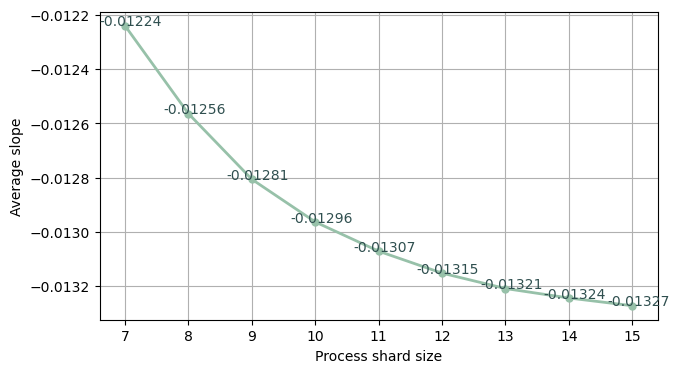

In [19]:
import matplotlib.pyplot as plt
"""
This code for section 5.1's Shard size and performance to save the figure.
"""
x = list(range(7, 16))

fig, ax = plt.subplots(figsize=(7.2, 4))
ax.plot(x, avg_slope, 'o-', color='#97C1A9', linewidth=2, markersize=5)

# add labels and title to the plot
ax.set_xlabel('Process shard size')
ax.set_ylabel('Average slope')

for i, j in zip(x, avg_slope):
    ax.annotate(f"{j:.5f}", xy=(i, j), xytext=(i-0.4, j), color='#2F4F4F')

# set x-axis grid lines to show
ax.grid(True, axis='x')
ax.grid(True, axis='y')

fig.savefig('fig/shard size1.pdf', format='pdf', transparent=True)
# display the plot
plt.show()




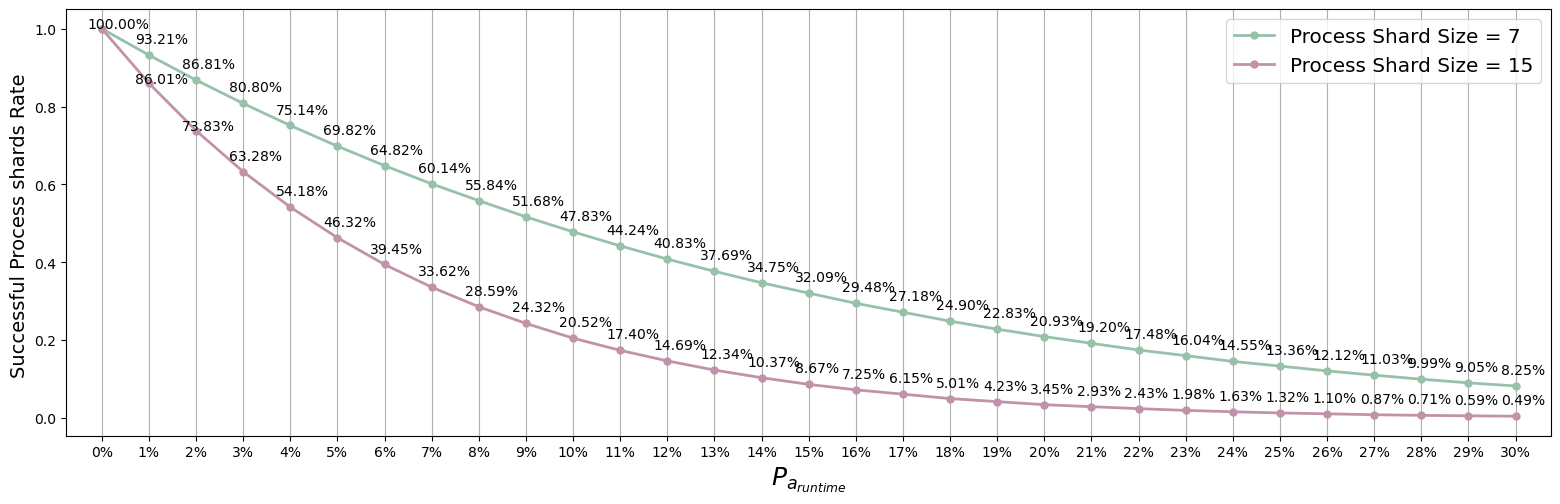

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
"""
This code is section 5.1's Shard size and performance.
"""
x = np.arange(0, 31)
# run the simulation and store the results in a list
success_rate = []
for j in range(0, 31):
    success_sum = 0
    for i in range(0, 500):
        total_nodes = 7*1000
        num_malicious_nodes = int(total_nodes * j * 0.01)
        nodes = [False] * (total_nodes - num_malicious_nodes) + [True] * num_malicious_nodes
        random.shuffle(nodes)

        # randomly divide nodes into groups of 7
        num_groups = total_nodes // 7
        groups = [nodes[i:i + 7] for i in range(0, total_nodes, 7)]

        # count number of successful groups (no malicious nodes)
        num_success = sum(1 for group in groups if not True in group)
        success_sum += num_success

    # calculate success rate and append to list
    success_rate.append(success_sum / 500 / num_groups)
corr = np.corrcoef(x, success_rate)[0, 1]
success_rate2 = []
for j in range(0, 31):
    success_sum = 0
    for i in range(0, 500):
        # generate 3000 nodes, of which j% are malicious
        total_nodes = 15*1000
        num_malicious_nodes = int(total_nodes * j * 0.01)
        nodes = [False] * (total_nodes - num_malicious_nodes) + [True] * num_malicious_nodes
        random.shuffle(nodes)

        # randomly divide nodes into groups of 15
        num_groups = total_nodes // 15
        groups = [nodes[i:i + 15] for i in range(0, total_nodes, 15)]

        # count number of successful groups (no malicious nodes)
        num_success = sum(1 for group in groups if not True in group)
        success_sum += num_success

    # calculate success rate and append to list
    success_rate2.append(success_sum / 500 / num_groups)
corr = np.corrcoef(x, success_rate2)[0, 1]
# calculate failure rates
failure_rate = [1 - s for s in success_rate]

# create a line chart of success and failure rates
x = np.arange(0, 31)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, success_rate, 'o-', label='Process Shard Size = 7', color='#97C1A9', linewidth=2, markersize=5)
ax.plot(x, success_rate2, 'o-', label='Process Shard Size = 15', color='#C192A9', linewidth=2, markersize=5)

# add labels and title to the plot
ax.set_xlabel('$P_{a_{runtime}}$', fontsize=18)
ax.set_ylabel('Successful Process shards Rate ', fontsize=14)
ax.legend(loc='upper right',fontsize="x-large")

# add value labels to the plot
for i, v in enumerate(success_rate):
    # format the text as a percentage with 2 decimal places
    if i<=0:
        text = '{:.2%}'.format(v)
        ax.text(i - 0.3, v - 0, text)
    if i>0:
        text = '{:.2%}'.format(v)
        ax.text(i - 0.3, v + 0.03, text)

# add value labels to the plot
for i, v in enumerate(success_rate2):
    # format the text as a percentage with 2 decimal places
    if i<=2 and i>0:
        text = '{:.2%}'.format(v)
        ax.text(i - 0.3, v - 0, text)
    if i>2:
        text = '{:.2%}'.format(v)
        ax.text(i - 0.3, v + 0.03, text)
# adjust x-axis ticks and tick labels
ax.set_xticks(x)
ax.set_xticklabels([f'{i}%' for i in x])

# automatically adjust subplot layout to avoid overlapping text
plt.tight_layout()
plt.xlim(-0.75, len(success_rate)-0.25 )

# set the width of the figure to fill the entire window
fig.set_size_inches(18, 5)

# set x-axis grid lines to show
ax.grid(True, axis='x')
fig.savefig('fig/shard size2.pdf', format='pdf', transparent=True)
# display the plot
plt.show()